# TP relatif à l'entendue des données, leur précision, à l'occupation mémoire et à la complexité algorithmique

### Les premières manipulations de travaux pratiques visent à sensibiliser les étudiants aux notions suivantes : taille des données numériques (entières et flottantes) pouvant être représentées, à la précision des nombres à virgule flottante et à l'implication sur les calculs, à la mémoire occupée par les différents types de données, à la complexité algorithmique et à la vitesse de convergence des différentes méthodes

### 1) Approximations π/4 ou π/2 par les différentes formules vues en TD avec nombre d'itérations pour obtenir une précision donnée, ou précision obtenue après un nombre donné d'itérations.

In [6]:
import math
import numpy as np

In [7]:
"""def approxi_pi_sur_4(p):
   somme = 0
    t = 1
    i = 0
    while math.fabs(t) > p:
        somme = somme + t
        i = i + 1
        t = (-1)**i / (2*i+1)
    return somme, i
    l = [(-1)**i/(2*i+1) for i in range(int((1-p)/(2*p))+1)]
    return sum(l), len(l)"""

def approximer(precision: float = None, iterations: int = None):
    
    assert precision is not None or iterations is not None, "Les deux paramètres ne peuvent pas être None"
    somme = 0
    i = 0
    terme = 1
    if precision:
        while np.abs(terme) > precision:
            somme += terme
            i += 1
            terme = -2 / ((4 * i - 1) * (4 * i + 1))
        return somme, i  # Retourne la somme calculée et le nombre d'itérations utilisées

    if iterations:
        for i in range(1, iterations):
            somme += terme
            terme_prec = terme
            terme = -2 / ((4 * i - 1) * (4 * i + 1))
        return somme, terme_prec - terme  # Retourne la somme et la différence entre le dernier et l'avant-dernier terme



In [8]:
precisions = [10**-i for i in range(6, 9)]
for precision in precisions:
    approx, iteration = approximer(precision=precision)
    print(f"aproximation : {approx} , precision {precision} ,  iteration : {iteration}" )


aproximation : 0.7857517700098428 , precision 1e-06 ,  iteration : 354
aproximation : 0.785509920209031 , precision 1e-07 ,  iteration : 1119
aproximation : 0.7854335190753924 , precision 1e-08 ,  iteration : 3536


In [5]:
math.pi/4

0.7853981633974483

In [9]:
def approxi_pi_sur_4(p):
    l = [(-1)**i/(2*i+1) for i in range(int((1-p)/(2*p))+1)]
    return sum(l), len(l)

In [10]:
precisions = [ 10**(-i) for i in range(1,8)]
l = [approxi_pi_sur_4(p) for p in precisions]
points = list(zip(precisions,[p[1] for p in l]))
x = [p[0] for p in points]
y = [p[1] for p in points]
print(x)
print(y)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]
[5, 50, 500, 5000, 50000, 500000, 5000000]


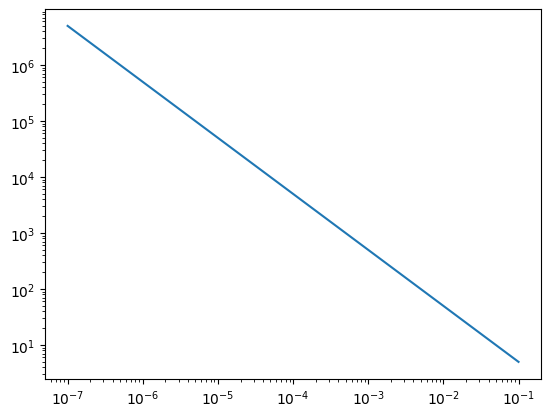

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,y)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

## 2) Calcul itératif et récursif du factoriel d'un entier

In [12]:
def factoriel_iteratif(n):
    p = 1
    for i in range(1, n+1):
        p = p*i
    return p

In [13]:
factoriel_iteratif(5)

120

In [14]:
def fact_r(n):
    return n*fact_r(n-1) if n != 0 else 1

In [15]:
fact_r(5)

120

## 3) Calcul de ∑ni=11i dans le sens des i croissant et dans le sens des i décroissants.

In [16]:
def sum_inverse(n):
    sum = 0.0
    for i in range(1, n+1):
        sum += 1/i
    return sum

In [17]:
def sum_inverse_desc(n):
    sum = 0.0
    for i in range(n, 0, -1):
        sum += 1/i
    return sum

In [26]:
x = range(40)
f1 = np.array([sum_inverse(i) for i in x])
f2 = np.array([sum_inverse_desc(i) for i in x])


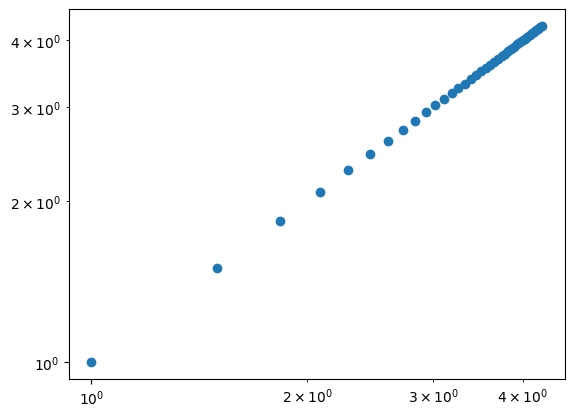

In [27]:
plt.figure()
plt.scatter(f1, f2)
ax = plt.gca()

ax.set_xscale('log')
ax.set_yscale('log')

### 4) Calcul de cosx par développement limité (avec et sans récurrence)
Pour l'ensemble de ces calculs, il vous est demandé de mettre en évidence le compromis vitesse/précision, par exemple en montrant l'évolution de la précision en fonction du nombre d'itérations ou en donnant le nombre d'itérations permettant d'atteindre une précision demandée.

In [20]:
def cos(x, precision):
    term = 1  
    s = term  
    n = 0  
    
    while abs(term) > precision:
        n += 1
        term *= -x**2 / ((2*n-1) * (2*n))  
        s += term
    
    return s

In [21]:
cos(np.pi/4, 1e-6)

0.7071067810719247

In [22]:
memory = np.array([1,1])

def fibonacci(n):
    global memory
    if len(memory) > n:
        return memory[n]
    v = fibonacci(n-1) + fibonacci(n-2)
    memory = np.append(memory, v)
    return v

In [84]:
print(memory)

[ 1  1  2  3  5  8 13 21 34]


In [85]:
fibonacci(8)

34

In [23]:
from functools import reduce
import operator

def factoriel_comprehension_liste(n):
    if n == 0:
        return 1
    else:
        return reduce(operator.mul, (i for i in range(1, n + 1)), 1)

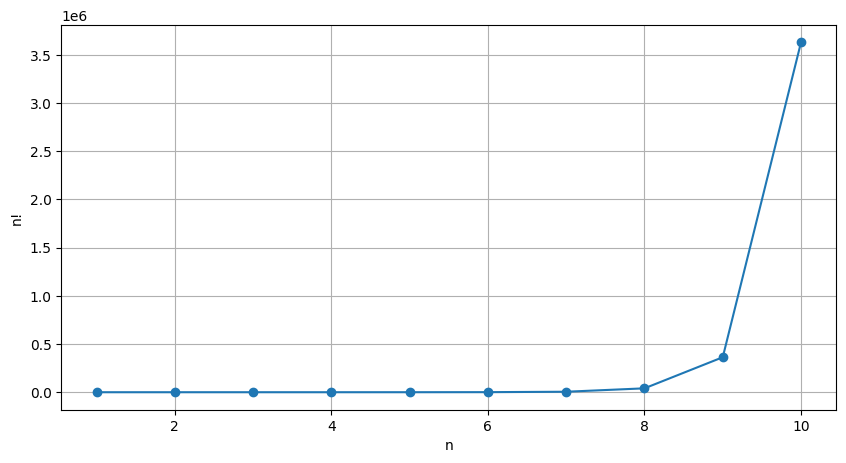

In [25]:
import matplotlib.pyplot as plt

x_values = list(range(1, 11))
y_values = [factoriel_comprehension_liste(x) for x in x_values]

plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, marker='o')
plt.xlabel('n')
plt.ylabel('n!')
plt.grid(True)
plt.show()